In [35]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [36]:
data=np.load("../thirtyfive/datasets/mnist/mnist_train_small.npy")

In [37]:
data.shape

(19999, 785)

In [67]:
X,y=data[:,1:],data[:,0]

In [68]:
y.shape

(19999,)

In [40]:
model=PCA(n_components=100)

In [41]:
model.fit(X)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
model.components_.shape

(100, 784)

In [43]:
x_mod=np.dot(X,(model.components_).T)

In [44]:
x_mod.shape

(19999, 100)

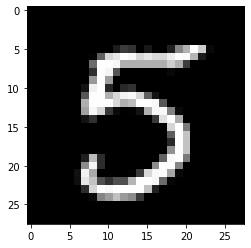

In [45]:
plt.imshow(X[0].reshape(28,28),cmap="gray")

In [46]:
x_rev=np.dot(x_mod,model.components_)

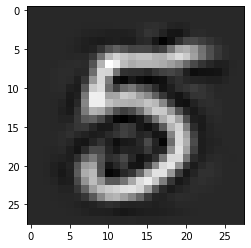

In [47]:
plt.imshow(x_rev[0].reshape(28,28),cmap="gray")

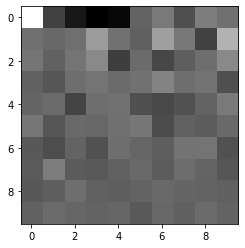

In [48]:
plt.imshow(x_mod[0].reshape(10,10),cmap="gray")

In [117]:
model = PCA(n_components=2)

In [120]:
model.components_.shape

(2, 784)

In [121]:
X_mod = model.fit_transform(X)

In [122]:
X_mod.shape

(19999, 2)

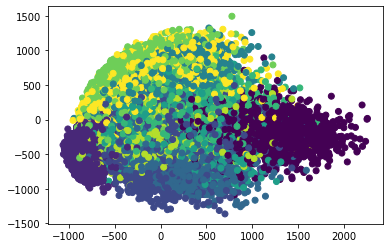

In [123]:
plt.scatter(X_mod[:, 0], X_mod[:, 1], c=y)

In [142]:
indices=y<3

In [143]:
indices

array([False, False, False, ...,  True, False, False])

In [144]:
x_sel=x_mod[indices]
y_sel=y[indices]

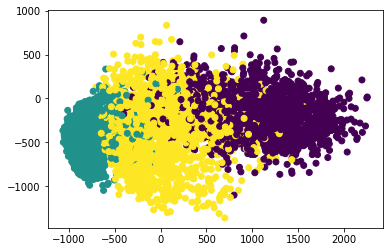

In [145]:
plt.scatter(x_sel[:,0],x_sel[:,1],c=y_sel)

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [147]:
m2=KNeighborsClassifier()

In [148]:
X_train, X_test, y_train, y_test = train_test_split(
...     x_sel, y_sel, test_size=0.33, random_state=42)

In [149]:
m2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [150]:
m2.score(X_test,y_test)

0.8518337408312958

In [151]:
model.components_.shape

(2, 784)